In [1]:
#import all the needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #for visualization of the clusters and data
import scipy.cluster.hierarchy as sch #for hierarchcal clustering
from sklearn.cluster import AgglomerativeClustering #for all the agglomerative clustering
import seaborn as sn #this is also used for visualization
from sklearn.cluster import KMeans #for kmeans clustering
from sklearn.cluster import DBSCAN #for DBSCAN clustering
from sklearn.preprocessing import LabelEncoder #for standardizing the data
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
df.shape

(3999, 12)

In [4]:
df.info()#no null values are present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

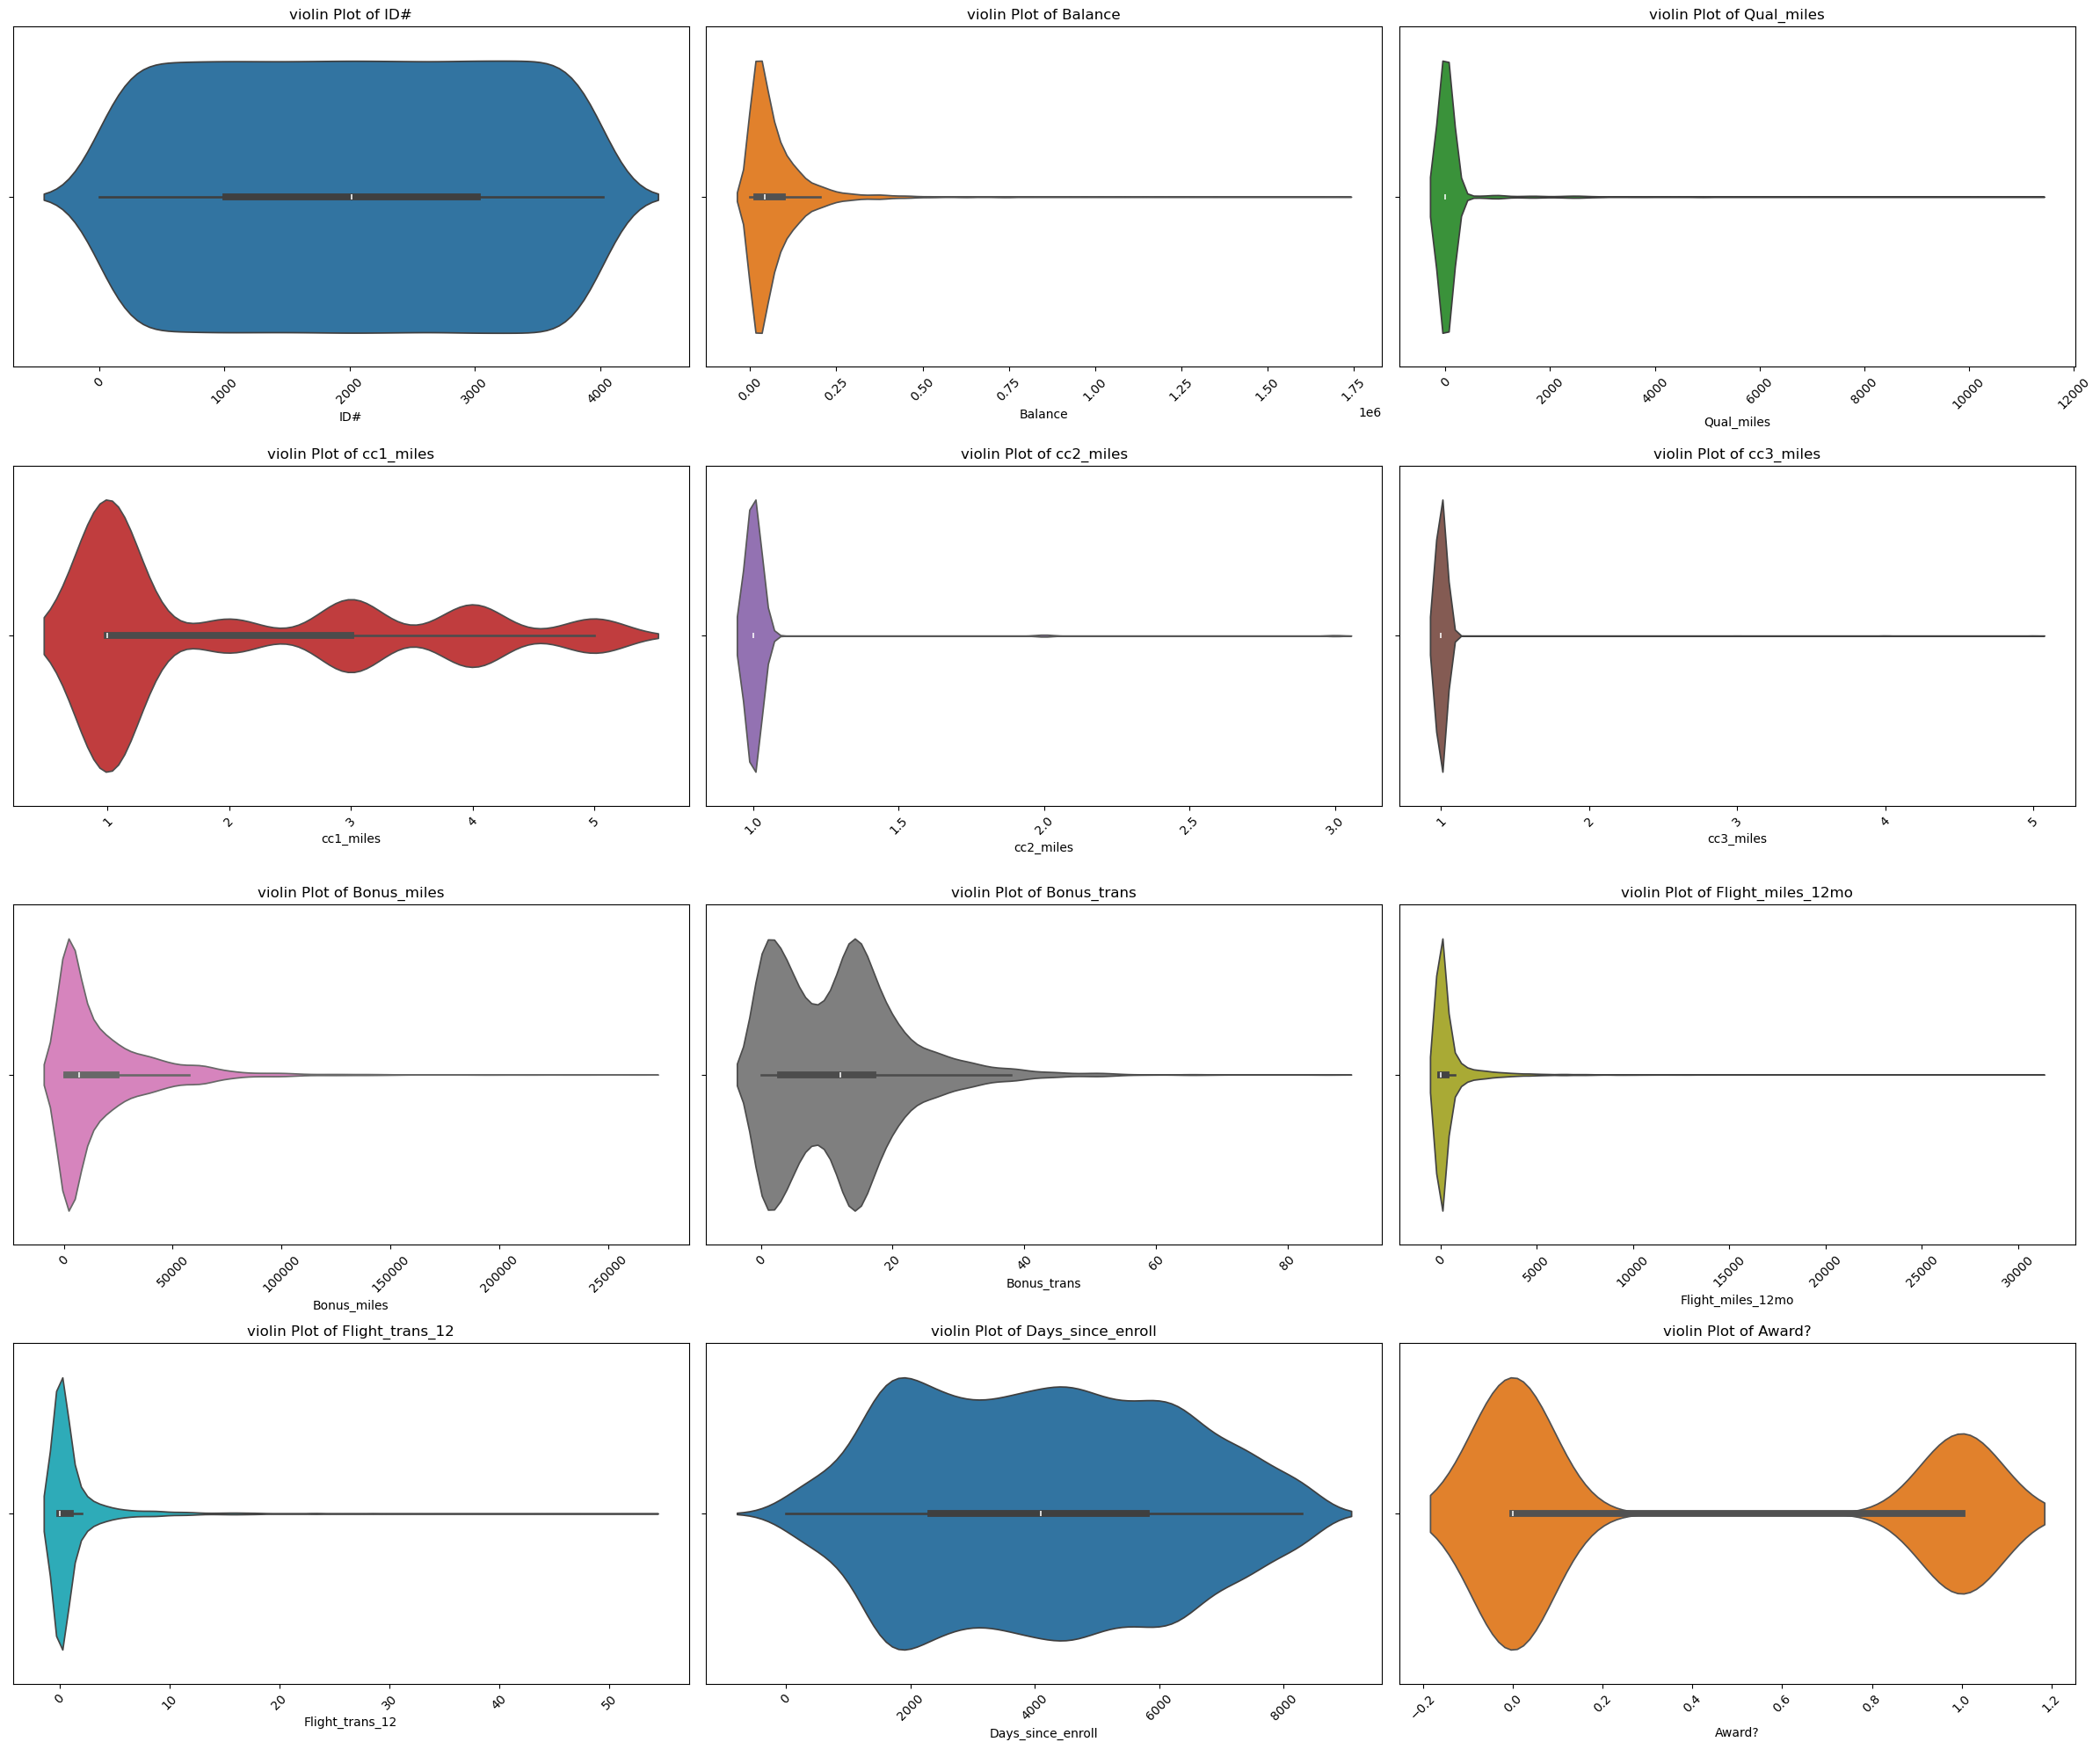

In [6]:
#colors = sn.color_palette("tab10", len(df))  
fig,axes=plt.subplots(4,3,figsize=(24,20))
axes=axes.flatten()
# Loop through each column and assign a unique color
for i, columns in enumerate(df):
    sn.violinplot(x=columns, data=df, ax=axes[i], color=sn.color_palette("tab10")[i % 10])  # Assigning different colors
    axes[i].set_title(f'violin Plot of {columns}')
    axes[i].tick_params(axis='x', rotation=45) 
plt.tight_layout()
plt.show()

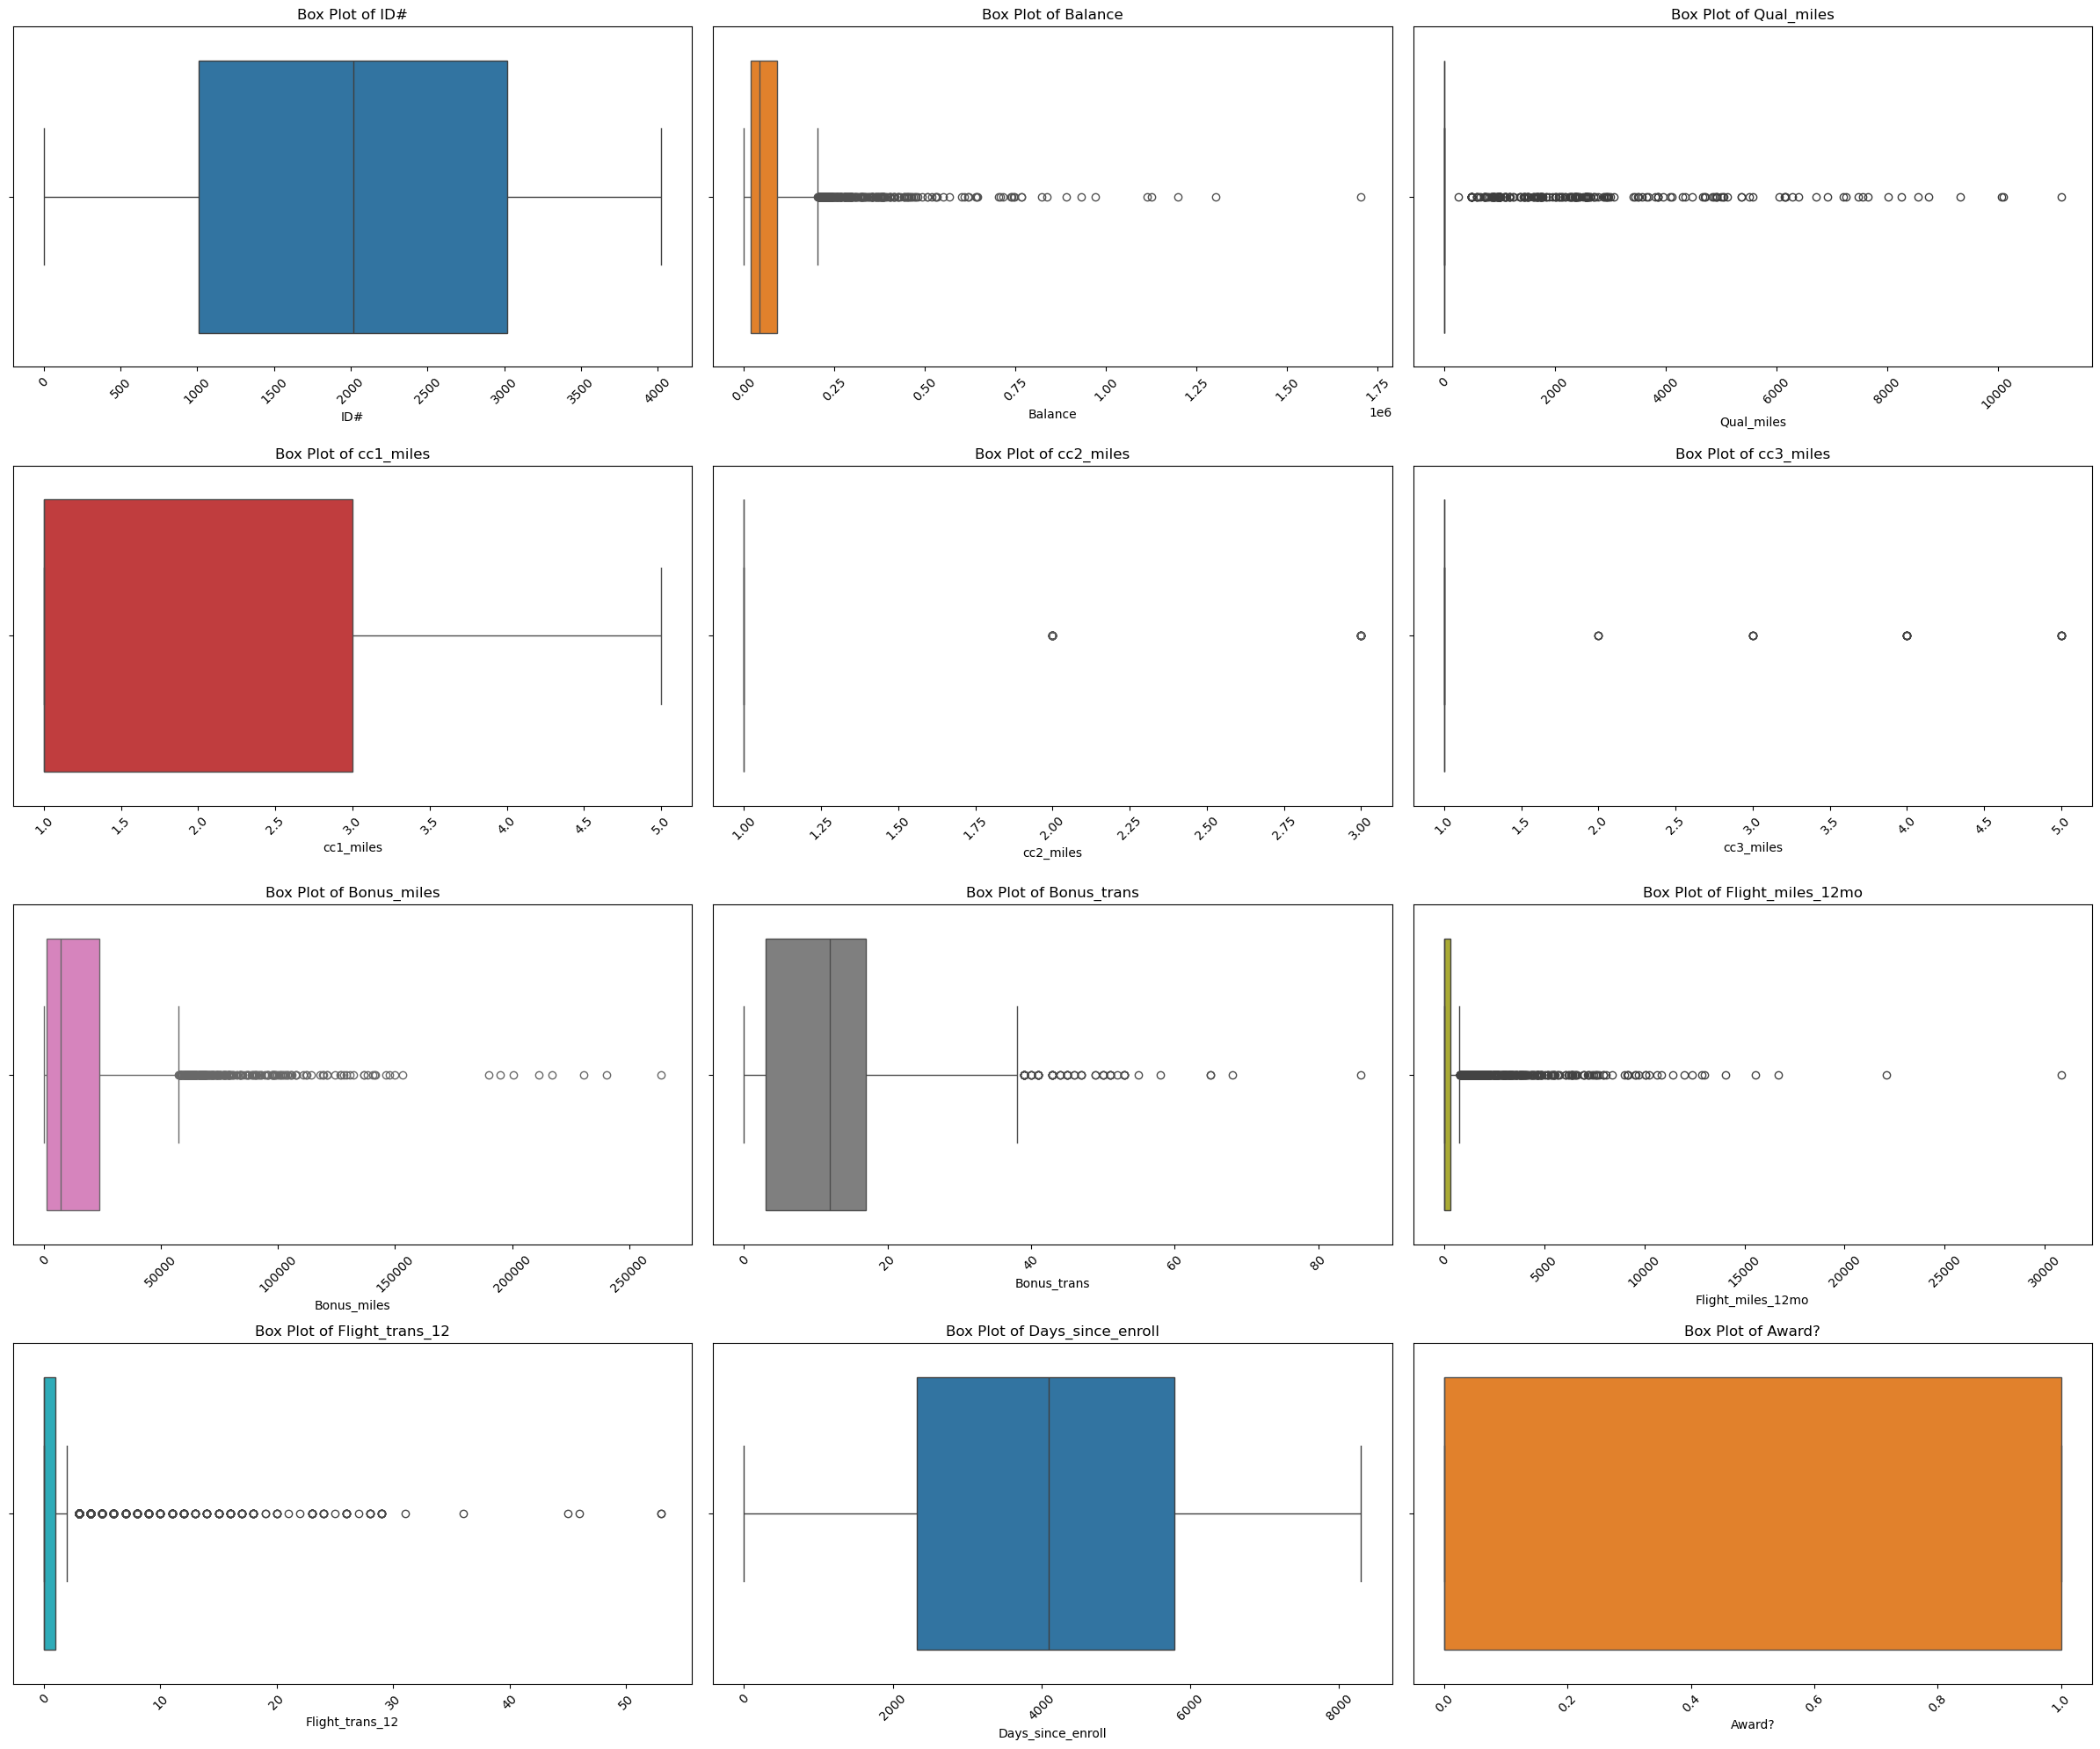

In [7]:
#we cannot do another plots as all the data is getting coinside with each other
#colors = sn.color_palette("tab10", len(df))  
fig,axes=plt.subplots(4,3,figsize=(24,20))
axes=axes.flatten()
# Loop through each column and assign a unique color
for i, columns in enumerate(df):
    sn.boxplot(x=columns, data=df, ax=axes[i], color=sn.color_palette("tab10")[i % 10])  # Assigning different colors
    axes[i].set_title(f'Box Plot of {columns}')
    axes[i].tick_params(axis='x', rotation=45) 
plt.tight_layout()
plt.show()

In [8]:
#we cannot get the outliers by visualization 
#when we do the DBSCAN to remove the outliers

In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
data_norm=norm_func(df.iloc[:,0:])

In [11]:
data_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [12]:
model=KMeans(n_clusters=3).fit(data_norm)
model.inertia_ 

954.5939420077893

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,5))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(data_norm)
  WCSS.append(model.inertia_)

<Figure size 800x500 with 0 Axes>

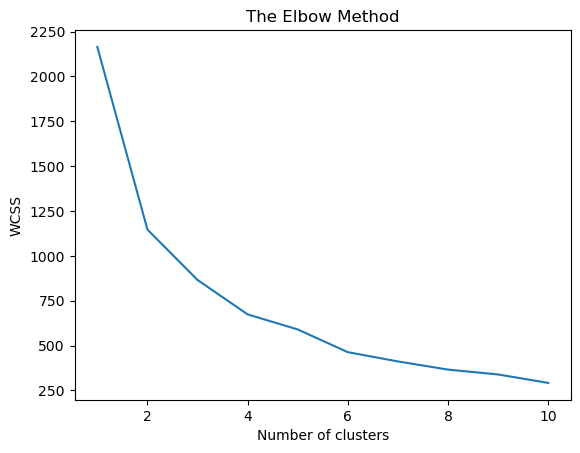

In [14]:
#get the elbow curve
import warnings
warnings.filterwarnings("ignore")
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
clf=KMeans(n_clusters=3)
#n value can be changed from 2-5 


In [16]:
y_names=clf.fit_predict(data_norm)

In [17]:
y_names

array([2, 2, 2, ..., 0, 1, 1])

In [18]:
clf.cluster_centers_

array([[ 4.33978319e-01,  5.69280197e-02,  2.15461508e-02,
         4.15428764e-01,  7.76502363e-03,  4.55773126e-03,
         1.09621005e-01,  1.83518364e-01,  2.78255837e-02,
         4.90489598e-02,  5.57398375e-01,  1.00000000e+00],
       [ 7.84391177e-01,  2.49282836e-02,  8.87792979e-03,
         1.08534684e-01,  7.79423227e-03,  1.55884645e-03,
         2.71275167e-02,  9.25972920e-02,  7.30242954e-03,
         1.18089972e-02,  2.53267723e-01, -4.99600361e-16],
       [ 2.86804641e-01,  4.56288154e-02,  6.79869957e-03,
         2.46761134e-01,  6.07287449e-03,  2.83400810e-03,
         5.09007197e-02,  1.20563035e-01,  7.38535003e-03,
         1.28332442e-02,  6.75605994e-01, -4.99600361e-16]])

In [19]:
clf.labels_

array([2, 2, 2, ..., 0, 1, 1])

In [20]:
clf.inertia_  

865.2650605842279

In [21]:
md=pd.Series(y_names)
data_norm['clust']=md
data_norm


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [22]:
data_norm.iloc[:,0:].groupby(data_norm.clust).mean() #this code computes the centroid (the average point) of each cluster in the feature space, where each cluster is in the n-dimensional space where n is the number of columns in data_norm.

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,,
0,0.433978,0.056928,0.021546,0.415429,0.007765,0.004558,0.109621,0.183518,0.027826,0.049049,0.557398,1.0,0.0
1,0.783946,0.024927,0.008864,0.108366,0.007782,0.001556,0.027095,0.092571,0.007291,0.011791,0.253623,0.0,1.0
2,0.286462,0.045663,0.006810,0.247161,0.006083,0.002839,0.050973,0.120636,0.007397,0.012854,0.675920,0.0,2.0


In [23]:
#do the scatter plotting to differentiate the clusters and visualize the clusters
plt.style.use('classic')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Qual_miles', ylabel='Bonus_miles'>

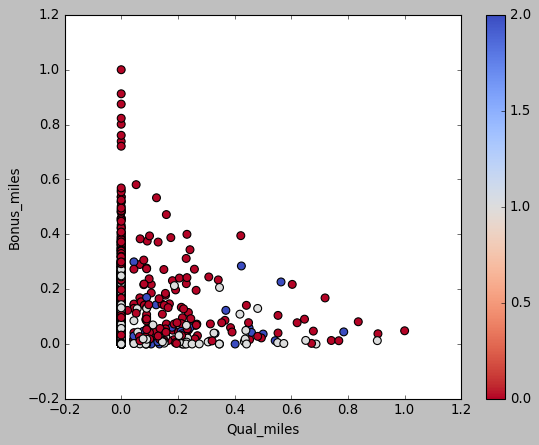

In [24]:
data_norm.plot("Qual_miles","Bonus_miles",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [25]:
silhouette_score(data_norm,y_names)
#

0.6072867700039972

In [26]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4,linkage = 'average',metric='euclidean')

In [27]:
# save clusters for chart
y_hc = hc.fit_predict(data_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [28]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,3


In [29]:
df["cluster_id"]=hc.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


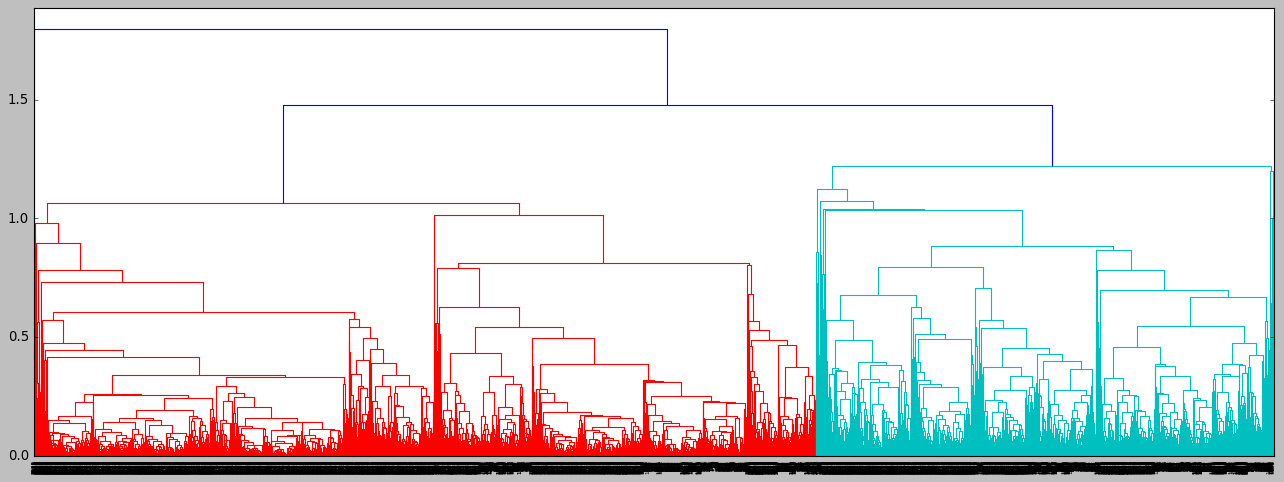

In [30]:
#Hierarchical Clustering
fig=plt.figure(figsize=(20,7))
dendrogram=sch.dendrogram(sch.linkage(norm_func(df),method='average'),labels=df.index)


In [31]:
#Hierarchical clustering cannot be applied on this data as the data is very huge.
#defining of the n_clusters is also difficult to get
#interpreatitions cannot be drawn from the Hierarchical clustering

In [70]:
#DBSCAN clustering
dbscan=DBSCAN(eps=0.5,min_samples=3)
data_norm['a']=dbscan.fit_predict (data_norm)

In [72]:
data_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,a
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0,1
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0,1
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0,1
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1,8


In [74]:
cl=pd.DataFrame(dbscan.labels_,columns=["cluster"])

In [76]:
cl.value_counts()

cluster
 1         1451
 8         1268
 0         1217
-1           11
 2           11
 10           9
 4            7
 5            6
 6            6
 9            5
 3            4
 7            4
Name: count, dtype: int64

In [78]:
pd.concat([df,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3,8


<Axes: xlabel='Balance', ylabel='Bonus_trans'>

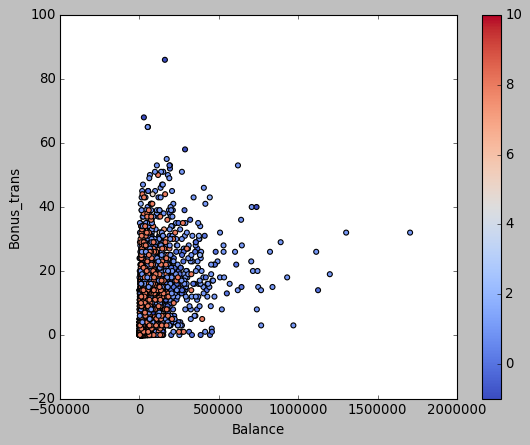

In [80]:
df.plot(x="Balance",y="Bonus_trans",c=dbscan.labels_,kind="scatter",cmap="coolwarm")

In [82]:
data_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,a
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,2,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,2,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,2,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,2,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0,1
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0,1
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0,1
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1,8


In [84]:
silhouette_score(data_norm,data_norm['a'])

0.6540315833201993

In [ ]:
#as the silhouette score is 65% which is good  